# Predicting the number of active cases in Slovakia.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Reading CSV File
df=pd.read_csv(r'C:\Users\DELL\Downloads\owid-covid-data.csv')

# df(owid-covid-data.csv) is a collection of the COVID-19 data maintained by Our World in Data.

In [2]:
#NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra.
# Pandas is a data analysis toolkit,It presents a diverse range of utilities,
#Matplotlib is a library for creating static, animated, and interactive visualizations in Python.
#Seaborn is a data visualization library in Python based on matplotlib.

In [3]:
#Basic Data Analysis

In [4]:
#basic data analysis,quick view of data set
#showes first five rows of the data se
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [5]:
df.shape

(50011, 41)

This data has 41 Columns and 50011 Entries

In [6]:
df.info()
#Summary of data frame, including the index datatype and column dtypes, non-null values and memory usage
#This method prints information about a DataFrame including the index dtype and column dtypes,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50011 entries, 0 to 50010
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         49721 non-null  object 
 1   continent                        49431 non-null  object 
 2   location                         50011 non-null  object 
 3   date                             50011 non-null  object 
 4   total_cases                      49378 non-null  float64
 5   new_cases                        49152 non-null  float64
 6   new_cases_smoothed               48373 non-null  float64
 7   total_deaths                     49378 non-null  float64
 8   new_deaths                       49152 non-null  float64
 9   new_deaths_smoothed              48373 non-null  float64
 10  total_cases_per_million          49088 non-null  float64
 11  new_cases_per_million            49088 non-null  float64
 12  new_cases_smoothed

From 41 columns 36 columns are float and 5 are object data type

# Slovakia - EDA
Exploratory data analysis for the country Slovakia. 
From covid 19 world dataset (df)Select data where location=Slovakia


In [7]:

df_slovakia=df[(df['location']=='Slovakia')]

In [8]:
print("The shape of the data frame is", (df_slovakia.shape))
print("The columns of the data frame are" , (df_slovakia.columns))

The shape of the data frame is (222, 41)
The columns of the data frame are Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_developmen

In [9]:
df_slovakia.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
41803,SVK,Europe,Slovakia,2020-03-07,1.0,1.0,NaN,0.0,0.0,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.855
41804,SVK,Europe,Slovakia,2020-03-08,3.0,2.0,NaN,0.0,0.0,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.855
41805,SVK,Europe,Slovakia,2020-03-09,5.0,2.0,NaN,0.0,0.0,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.855
41806,SVK,Europe,Slovakia,2020-03-11,7.0,2.0,NaN,0.0,0.0,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.855
41807,SVK,Europe,Slovakia,2020-03-12,10.0,3.0,NaN,0.0,0.0,NaN,...,30155.152,0.7,287.959,7.29,23.1,37.7,NaN,5.82,77.54,0.855


In [10]:

#sort slovakia data set (sort() method sorts the list ascending by default)
df_slovakia=df_slovakia.reindex(sorted(df_slovakia.columns), axis=1)
df_slovakia.info()
#41 columns and two data types object and float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aged_65_older                    222 non-null    float64
 1   aged_70_older                    222 non-null    float64
 2   cardiovasc_death_rate            222 non-null    float64
 3   continent                        222 non-null    object 
 4   date                             222 non-null    object 
 5   diabetes_prevalence              222 non-null    float64
 6   extreme_poverty                  222 non-null    float64
 7   female_smokers                   222 non-null    float64
 8   gdp_per_capita                   222 non-null    float64
 9   handwashing_facilities           0 non-null      float64
 10  hospital_beds_per_thousand       222 non-null    float64
 11  human_development_index          222 non-null    float64
 12  iso_code        

# Number of missing values per column.¶

In [11]:
# number of missing value per column
df_slovakia.isnull().sum()

aged_65_older                        0
aged_70_older                        0
cardiovasc_death_rate                0
continent                            0
date                                 0
diabetes_prevalence                  0
extreme_poverty                      0
female_smokers                       0
gdp_per_capita                       0
handwashing_facilities             222
hospital_beds_per_thousand           0
human_development_index              0
iso_code                             0
life_expectancy                      0
location                             0
male_smokers                         0
median_age                           0
new_cases                            0
new_cases_per_million                0
new_cases_smoothed                   5
new_cases_smoothed_per_million       5
new_deaths                           0
new_deaths_per_million               0
new_deaths_smoothed                  5
new_deaths_smoothed_per_million      5
new_tests                

In [12]:
#converting string date to date-time
df_slovakia['date'] = pd.to_datetime(df_slovakia['date']) 
df_slovakia.head()

,aged_65_older,aged_70_older,cardiovasc_death_rate,continent,date,diabetes_prevalence,extreme_poverty,female_smokers,gdp_per_capita,handwashing_facilities,...,positive_rate,stringency_index,tests_per_case,tests_units,total_cases,total_cases_per_million,total_deaths,total_deaths_per_million,total_tests,total_tests_per_thousand
41803,15.07,9.167,287.959,Europe,2020-03-07,7.29,0.7,23.1,30155.152,NaN,...,NaN,16.67,NaN,NaN,1.0,0.183,0.0,0.0,NaN,NaN
41804,15.07,9.167,287.959,Europe,2020-03-08,7.29,0.7,23.1,30155.152,NaN,...,NaN,16.67,NaN,NaN,3.0,0.549,0.0,0.0,NaN,NaN
41805,15.07,9.167,287.959,Europe,2020-03-09,7.29,0.7,23.1,30155.152,NaN,...,NaN,22.22,NaN,NaN,5.0,0.916,0.0,0.0,NaN,NaN
41806,15.07,9.167,287.959,Europe,2020-03-11,7.29,0.7,23.1,30155.152,NaN,...,NaN,37.04,NaN,NaN,7.0,1.282,0.0,0.0,NaN,NaN
41807,15.07,9.167,287.959,Europe,2020-03-12,7.29,0.7,23.1,30155.152,NaN,...,NaN,49.07,NaN,NaN,10.0,1.832,0.0,0.0,NaN,NaN


In [13]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   aged_65_older                    222 non-null    float64       
 1   aged_70_older                    222 non-null    float64       
 2   cardiovasc_death_rate            222 non-null    float64       
 3   continent                        222 non-null    object        
 4   date                             222 non-null    datetime64[ns]
 5   diabetes_prevalence              222 non-null    float64       
 6   extreme_poverty                  222 non-null    float64       
 7   female_smokers                   222 non-null    float64       
 8   gdp_per_capita                   222 non-null    float64       
 9   handwashing_facilities           0 non-null      float64       
 10  hospital_beds_per_thousand       222 non-null    float64

#Remove unnecessary columns,columns having lot of missing values,and columns having duplicate name

In [14]:
df_slovakia.drop(['handwashing_facilities','location','iso_code','continent','location',],axis=1, inplace=True)

In [15]:
df_slovakia.info()
#after drop we got 37 cols

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   aged_65_older                    222 non-null    float64       
 1   aged_70_older                    222 non-null    float64       
 2   cardiovasc_death_rate            222 non-null    float64       
 3   date                             222 non-null    datetime64[ns]
 4   diabetes_prevalence              222 non-null    float64       
 5   extreme_poverty                  222 non-null    float64       
 6   female_smokers                   222 non-null    float64       
 7   gdp_per_capita                   222 non-null    float64       
 8   hospital_beds_per_thousand       222 non-null    float64       
 9   human_development_index          222 non-null    float64       
 10  life_expectancy                  222 non-null    float64

# Impute the missing values¶

In [16]:
df_slovakia.isnull().sum()

aged_65_older                       0
aged_70_older                       0
cardiovasc_death_rate               0
date                                0
diabetes_prevalence                 0
extreme_poverty                     0
female_smokers                      0
gdp_per_capita                      0
hospital_beds_per_thousand          0
human_development_index             0
life_expectancy                     0
male_smokers                        0
median_age                          0
new_cases                           0
new_cases_per_million               0
new_cases_smoothed                  5
new_cases_smoothed_per_million      5
new_deaths                          0
new_deaths_per_million              0
new_deaths_smoothed                 5
new_deaths_smoothed_per_million     5
new_tests                          35
new_tests_per_thousand             35
new_tests_smoothed                 15
new_tests_smoothed_per_thousand    15
population                          0
population_d

In [17]:

# before filling up the missing value ,check the skewness of data
df_slovakia.skew(axis = 0, skipna = True)

aged_65_older                      0.000000
aged_70_older                      0.000000
cardiovasc_death_rate              0.000000
diabetes_prevalence                0.000000
extreme_poverty                    0.000000
female_smokers                     0.000000
gdp_per_capita                     0.000000
hospital_beds_per_thousand         0.000000
human_development_index            0.000000
life_expectancy                    0.000000
male_smokers                       0.000000
median_age                         0.000000
new_cases                          4.214453
new_cases_per_million              4.214450
new_cases_smoothed                 3.437158
new_cases_smoothed_per_million     3.437153
new_deaths                         3.823200
new_deaths_per_million             3.825842
new_deaths_smoothed                1.727269
new_deaths_smoothed_per_million    1.730060
new_tests                          1.428464
new_tests_per_thousand             1.428402
new_tests_smoothed              

In [18]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,4.937800e+04,49152.000000,48373.000000,4.937800e+04,49152.000000,48373.000000,49088.000000,49088.000000,48308.000000,49088.000000,...,43940.000000,29206.000000,44515.000000,46124.000000,34736.000000,34289.000000,21055.000000,40138.000000,49085.000000,42952.000000
mean,1.199722e+05,1563.743612,1548.071669,4.552445e+03,44.436666,44.525103,2186.259761,27.178230,26.466074,63.271600,...,20732.618286,12.343601,252.894976,8.058799,10.748919,32.612312,52.315781,3.104921,73.941212,0.722791
std,1.239329e+06,14115.142335,13888.593262,4.205588e+04,371.467692,361.269215,4521.605470,91.365568,61.910510,150.393907,...,20434.687198,19.361176,117.118446,4.163657,10.510257,13.485200,31.625998,2.531336,7.373232,0.152807
min,0.000000e+00,-8261.000000,-552.000000,0.000000e+00,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,7.300000e+01,0.000000,0.714000,1.000000e+00,0.000000,0.000000,40.348500,0.000000,0.179000,0.077750,...,5338.454000,0.500000,156.139000,5.310000,1.900000,21.400000,21.222000,1.300000,69.870000,0.601000
50%,1.193000e+03,11.000000,16.286000,2.400000e+01,0.000000,0.286000,323.536000,1.724000,3.253500,5.791000,...,14048.881000,2.000000,240.208000,7.140000,6.300000,31.400000,52.232000,2.500000,75.400000,0.752000
75%,1.318900e+04,180.000000,186.143000,2.757500e+02,3.000000,3.286000,2296.409250,19.996000,22.248500,42.616500,...,30155.152000,18.100000,318.991000,10.390000,19.600000,40.900000,83.741000,4.200000,79.190000,0.847000
max,3.858123e+07,388539.000000,336660.571000,1.093140e+06,10468.000000,7459.143000,45029.246000,8652.658000,1236.094000,1237.551000,...,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


Text(0.5, 1.0, 'Histogram bar graph of Total_tests')

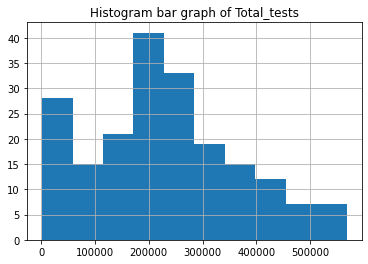

In [19]:
#total_tests

df_slovakia.total_tests.hist()
plt.plot()
plt.title('Histogram bar graph of Total_tests')

From the above graph we see data is not normally distributed and it is right skewed

In [22]:
#repalce missing value of " new_tests" with median value,
df_slovakia["total_tests"].fillna(df_slovakia["total_tests"].median(), inplace = True)

In [24]:
#repalce missing value of " new_tests" with median value,
df_slovakia["new_cases"].fillna(df_slovakia["new_cases"].median(), inplace = True)

In [25]:
df_slovakia["new_cases"].isnull().sum()

0

Text(0.5, 1.0, 'Histogram bar graph of New_tests')

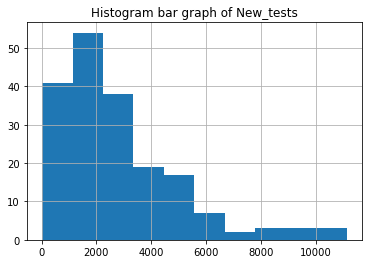

In [26]:
#new_tests_per_thousand 
df_slovakia.new_tests.hist()
plt.plot()
plt.title('Histogram bar graph of New_tests')


From the above graph we see data is not normally distributed and it is right skewed.

In [27]:
#repalce missing value of " new_tests" with median value,
df_slovakia["new_tests"].fillna(df_slovakia["new_tests"].median(), inplace = True)

In [ ]:
#total_tests

Text(0.5, 1.0, 'Histogram bar graph of New_tests_per_thousand')

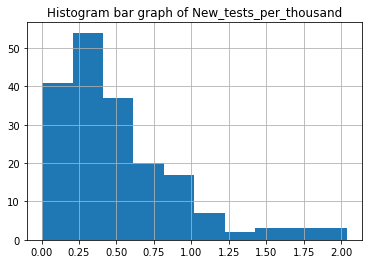

In [28]:
#new_tests_per_thousand 
df_slovakia.new_tests_per_thousand.hist()
plt.plot()
plt.title('Histogram bar graph of New_tests_per_thousand')

In [29]:
df_slovakia["new_tests_per_thousand"].isnull().sum()

35

In [32]:
#repalce missing value of " New_tests_per_thousand" with median value,as it is right skewed and is not normally distributed
df_slovakia["new_tests_per_thousand"].fillna(df_slovakia["new_tests_per_thousand"].median(), inplace = True)

In [31]:
df_slovakia["new_tests_per_thousand"].isnull().sum()

0

Text(0.5, 1.0, 'Histogram bar graph of Positive_rate')

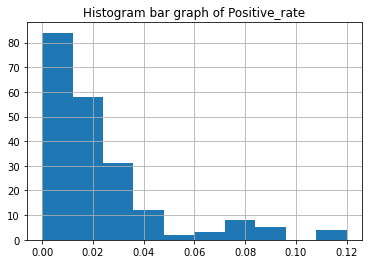

In [33]:
#positive_rate 
#new_tests_per_thousand 
df_slovakia.positive_rate.hist()
plt.plot()
plt.title('Histogram bar graph of Positive_rate')

In [34]:
df_slovakia["positive_rate"].fillna(df_slovakia["positive_rate"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram bar graph of stringency_index')

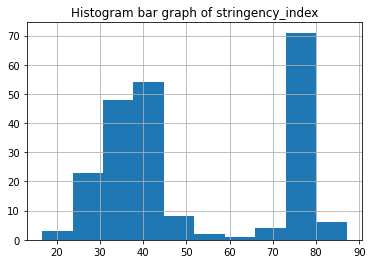

In [35]:
#stringency_index
df_slovakia.stringency_index.hist()
plt.plot()
plt.title('Histogram bar graph of stringency_index')

In [36]:
df_slovakia["stringency_index"].fillna(df_slovakia["stringency_index"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram bar graph of Tests_per_case')

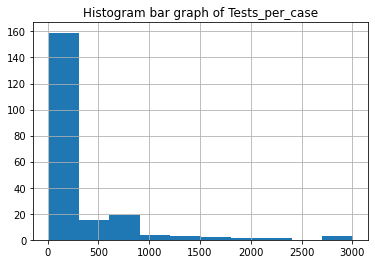

In [37]:
df_slovakia.tests_per_case.hist()
plt.plot()
plt.title('Histogram bar graph of Tests_per_case')

In [38]:
df_slovakia["tests_per_case"].fillna(df_slovakia["tests_per_case"].median(), inplace = True)

In [39]:
#tests_units
df_slovakia["tests_units"].describe()


count                 214
unique                  1
top       tests performed
freq                  214
Name: tests_units, dtype: object

In [40]:
df_slovakia["tests_units"].value_counts()

tests performed    214
Name: tests_units, dtype: int64

# Convert categorical variable tests_units into dummy(one hot encoding)

In [41]:

# Convert categorical variable  tests_units into dummy(one hot encoding)
test_performed=pd.get_dummies(df_slovakia['tests_units'])

In [42]:
# convert categorical vaiable (tests_units) to numeric 
df_slovakia = pd.concat([df_slovakia,test_performed], axis=1)

In [43]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   aged_65_older                    222 non-null    float64       
 1   aged_70_older                    222 non-null    float64       
 2   cardiovasc_death_rate            222 non-null    float64       
 3   date                             222 non-null    datetime64[ns]
 4   diabetes_prevalence              222 non-null    float64       
 5   extreme_poverty                  222 non-null    float64       
 6   female_smokers                   222 non-null    float64       
 7   gdp_per_capita                   222 non-null    float64       
 8   hospital_beds_per_thousand       222 non-null    float64       
 9   human_development_index          222 non-null    float64       
 10  life_expectancy                  222 non-null    float64

In [44]:
#we can delete tests_units as we have changes (tests_units) category variable to numerical-tests performed
df_slovakia.drop(["tests_units"],axis=1,inplace=True)

Text(0.5, 1.0, 'Histogram bar graph of Total_tests_per_thousand')

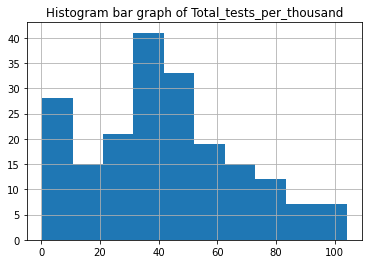

In [45]:
#total_tests_per_thousand
df_slovakia.total_tests_per_thousand.hist()
plt.plot()
plt.title('Histogram bar graph of Total_tests_per_thousand')

In [46]:
df_slovakia["total_tests_per_thousand"].fillna(df_slovakia["total_tests_per_thousand"].median(), inplace = True)

Text(0.5, 1.0, 'Histogram bar graph of New_cases_smoothed')

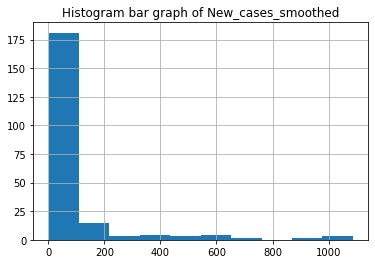

In [47]:
#total_tests_per_thousand
df_slovakia.new_cases_smoothed.hist()
plt.plot()
plt.title('Histogram bar graph of New_cases_smoothed')

Text(0.5, 1.0, 'Histogram bar graph of new_tests_smoothed')

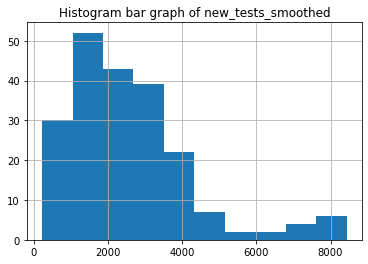

In [48]:
#total_tests_per_thousand
df_slovakia.new_tests_smoothed.hist()
plt.plot()
plt.title('Histogram bar graph of new_tests_smoothed')

Text(0.5, 1.0, 'Histogram bar graph of new_deaths_smoothed')

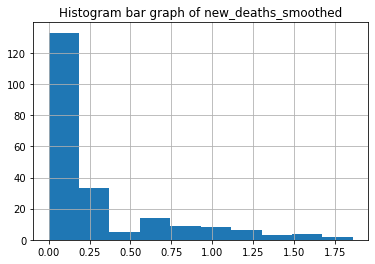

In [49]:
#total_tests_per_thousand
df_slovakia.new_deaths_smoothed.hist()
plt.plot()
plt.title('Histogram bar graph of new_deaths_smoothed')

In [50]:
#impute the missing values with median 
df_slovakia['new_cases_smoothed'] = df_slovakia['new_cases_smoothed'].fillna(df_slovakia['new_cases_smoothed'].median())
df_slovakia['new_cases_smoothed_per_million'] = df_slovakia['new_cases_smoothed_per_million'].fillna(df_slovakia['new_cases_smoothed'].median())
df_slovakia['new_tests_smoothed'] = df_slovakia['new_tests_smoothed'].fillna(df_slovakia['new_tests_smoothed'].median())
df_slovakia['new_tests_smoothed_per_thousand'] = df_slovakia['new_tests_smoothed_per_thousand'].fillna(df_slovakia['new_tests_smoothed_per_thousand'].median())
df_slovakia['new_deaths_smoothed'] = df_slovakia['new_deaths_smoothed'].fillna(df_slovakia['new_deaths_smoothed'].median())
df_slovakia['new_deaths_smoothed_per_million'] = df_slovakia['new_deaths_smoothed_per_million'].fillna(df_slovakia['new_deaths_smoothed_per_million'].median())


In [54]:

print(df_slovakia.isnull().values.sum())

0


In [ ]:
df_slovakia.isnull().sum()

# Univarate Analysis
Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x1d5808f7dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5809054c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d5808f7a60>],
 'medians': [<matplotlib.lines.Line2D at 0x1d580905b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d580905e80>],
 'means': []}

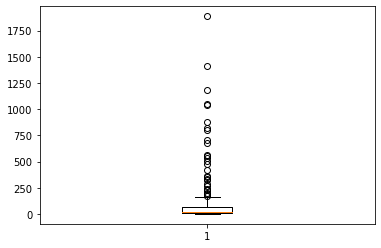

In [52]:
plt.boxplot(df_slovakia["new_cases"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d58099bf10>,
 'caps': [<matplotlib.lines.Line2D at 0x1d5809a8610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d58099bbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d5809a8cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d5809a8fd0>],
 'means': []}

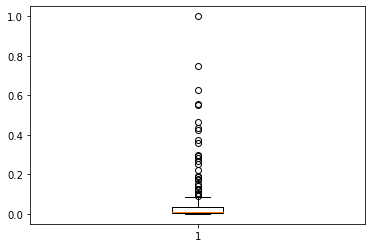

In [53]:
#normalize "new_cases"
df_slovakia["new_cases"]=(df_slovakia["new_cases"])/df_slovakia["new_cases"].max()
plt.boxplot(df_slovakia["new_cases"])

Min,Lower Quartile and Median are in same position.
lot of outliers  from 0.1 .
Data is not symmetrical.
The data is right skewed.

# 
Bivariate analysis

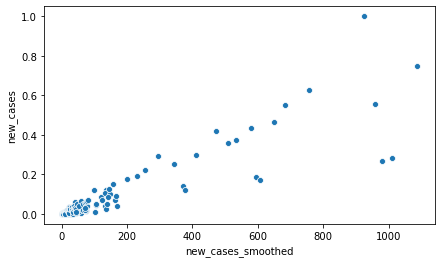

In [55]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_cases_smoothed'], y=df_slovakia["new_cases"])

In [151]:
(df_slovakia['new_cases_smoothed']).corr(df_slovakia['new_cases'])

0.9040389497895575

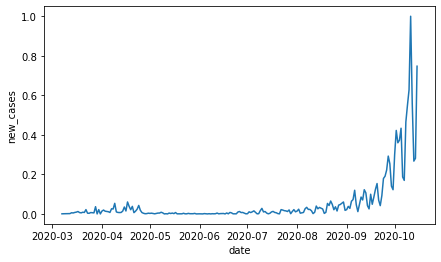

In [70]:
plt.figure(figsize=(7,4))
sns.lineplot(x=df_slovakia['date'], y=df_slovakia["new_cases"])

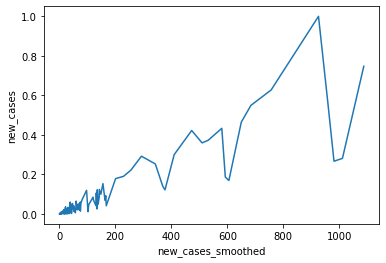

In [56]:
sns.lineplot(x='new_cases_smoothed',y='new_cases', data=df_slovakia)

Text(0.5, 1.0, 'New_cases vs New_test')

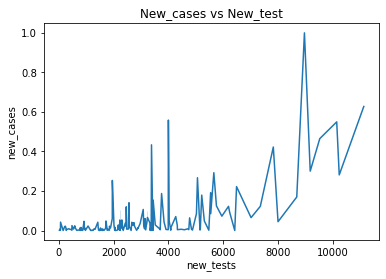

In [57]:
sns.lineplot(x='new_tests',y='new_cases', data=df_slovakia)
plt.title('New_cases vs New_test')

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_tests'], y=df_slovakia["new_cases"])

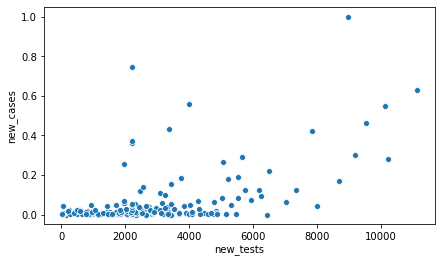

In [60]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_tests'], y=df_slovakia["new_cases"])

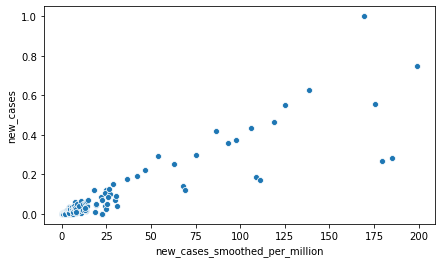

In [90]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_cases_smoothed_per_million'], y=df_slovakia["new_cases"])

In [ ]:
(df_slovakia['total_deaths_per_million']).corr(df_slovakia['new_cases'])

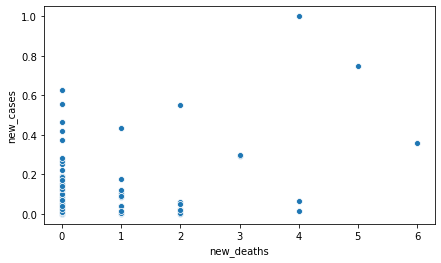

In [92]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia['new_deaths'], y=df_slovakia["new_cases"])

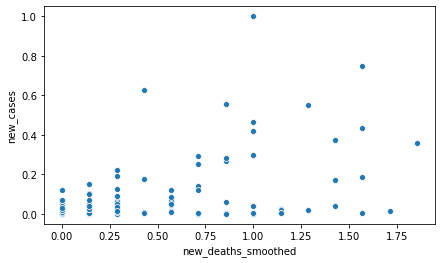

In [96]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia["new_deaths_smoothed"], y=df_slovakia["new_cases"])

In [100]:

(df_slovakia['new_tests_smoothed_per_thousand']).corr(df_slovakia['new_cases'])

0.7084479944756488

In [103]:
(df_slovakia['positive_rate']).corr(df_slovakia['new_cases'])

0.7588552844322561

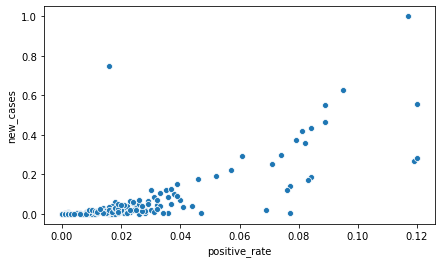

In [104]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia["positive_rate"], y=df_slovakia["new_cases"])

In [ ]:
total_deaths

In [115]:
(df_slovakia['total_deaths_per_million']).corr(df_slovakia['new_cases'])

0.5929561792833328

In [113]:
(df_slovakia['total_cases_per_million']).corr(df_slovakia['new_cases'])

0.8834093994580932

In [ ]:
total_tests

In [117]:
(df_slovakia['total_tests_per_thousand']).corr(df_slovakia['new_cases'])

0.5788107931317118

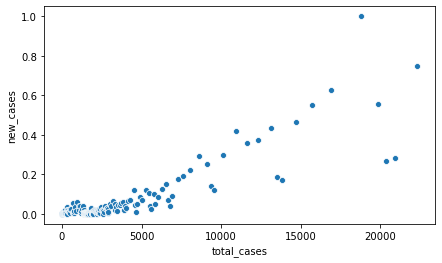

In [111]:
plt.figure(figsize=(7,4))
sns.scatterplot(x=df_slovakia["total_cases"], y=df_slovakia["new_cases"])

In [89]:

(df_slovakia['new_cases_smoothed_per_million']).corr(df_slovakia['new_cases'])

0.8999409328119796

In [136]:
(df_slovakia['hospital_beds_per_thousand']).corr(df_slovakia['new_cases'])

-4.712654854391359e-17

In [ ]:
(df_slovakia['new_deaths_smoothed_per_million']).corr(df_slovakia['new_cases'])

In [87]:

(df_slovakia['new_cases_smoothed']).corr(df_slovakia['new_cases'])

0.9040389497895575

Text(0.5, 1.0, 'New_cases vs date')

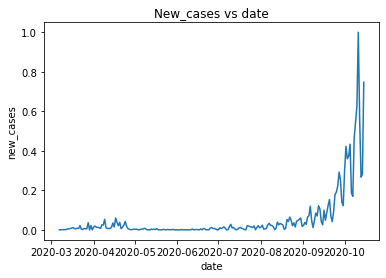

In [58]:
sns.lineplot(x='date',y='new_cases', data=df_slovakia)
plt.title('New_cases vs date')

Text(0.5, 1.0, 'New_deaths_smoothed  vs New_cases')

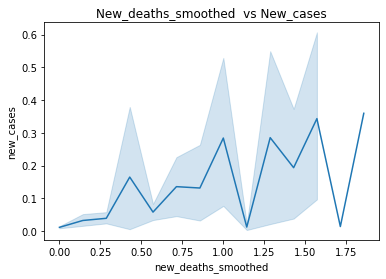

In [121]:
sns.lineplot(x='new_deaths_smoothed',y='new_cases', data=df_slovakia)
plt.title('New_deaths_smoothed  vs New_cases')

Text(0.5, 1.0, 'new_deaths vs date')

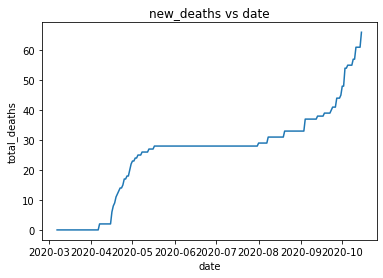

In [125]:
sns.lineplot(y='total_deaths',x='date', data=df_slovakia)
plt.title('new_deaths vs date')

Text(0.5, 1.0, 'total_cases vs date')

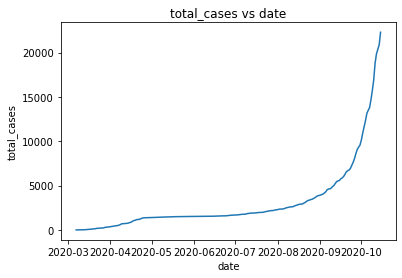

In [126]:
sns.lineplot(y='total_cases',x='date', data=df_slovakia)
plt.title('total_cases vs date')

Text(0.5, 1.0, 'total_cases vs new_cases')

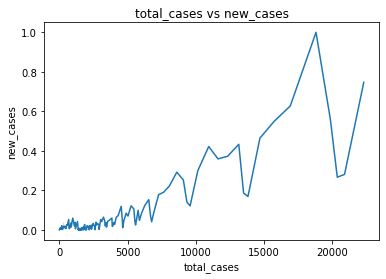

In [128]:
sns.lineplot(x='total_cases',y='new_cases', data=df_slovakia)
plt.title('total_cases vs new_cases')

Text(0.5, 1.0, 'total_cases vs date')

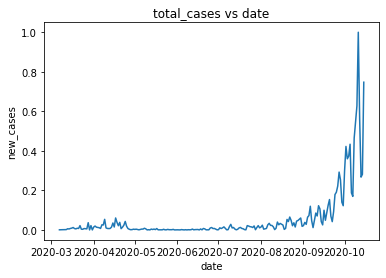

In [130]:
sns.lineplot(y='new_cases',x='date', data=df_slovakia)
plt.title('total_cases vs date')

Text(0.5, 1.0, 'total_cases vs date')

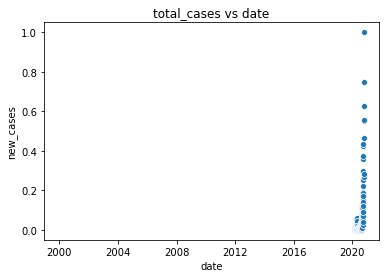

In [131]:
sns.scatterplot(y='new_cases',x='date', data=df_slovakia)
plt.title('total_cases vs date')

In [141]:
(df_slovakia['tests performed']).corr(df_slovakia['new_cases'])

-0.06402202710058795

In [149]:
(df_slovakia['extreme_poverty']).corr(df_slovakia['new_cases'])

-4.712654854391359e-17

Text(0.5, 1.0, 'total_cases vs date')

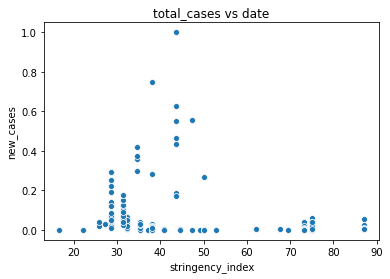

In [137]:
#stringency_index
sns.scatterplot(y='new_cases',x='stringency_index', data=df_slovakia)
plt.title('total_cases vs date')

Text(0.5, 1.0, 'total_cases vs date')

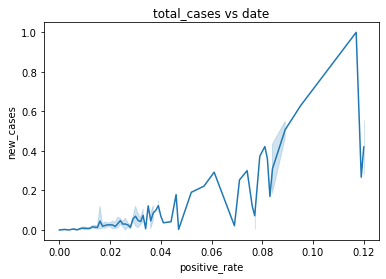

In [132]:
sns.lineplot(y='new_cases',x='positive_rate', data=df_slovakia)
plt.title('total_cases vs date')

In [133]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   aged_65_older                    222 non-null    float64       
 1   aged_70_older                    222 non-null    float64       
 2   cardiovasc_death_rate            222 non-null    float64       
 3   date                             222 non-null    datetime64[ns]
 4   diabetes_prevalence              222 non-null    float64       
 5   extreme_poverty                  222 non-null    float64       
 6   female_smokers                   222 non-null    float64       
 7   gdp_per_capita                   222 non-null    float64       
 8   hospital_beds_per_thousand       222 non-null    float64       
 9   human_development_index          222 non-null    float64       
 10  life_expectancy                  222 non-null    float64

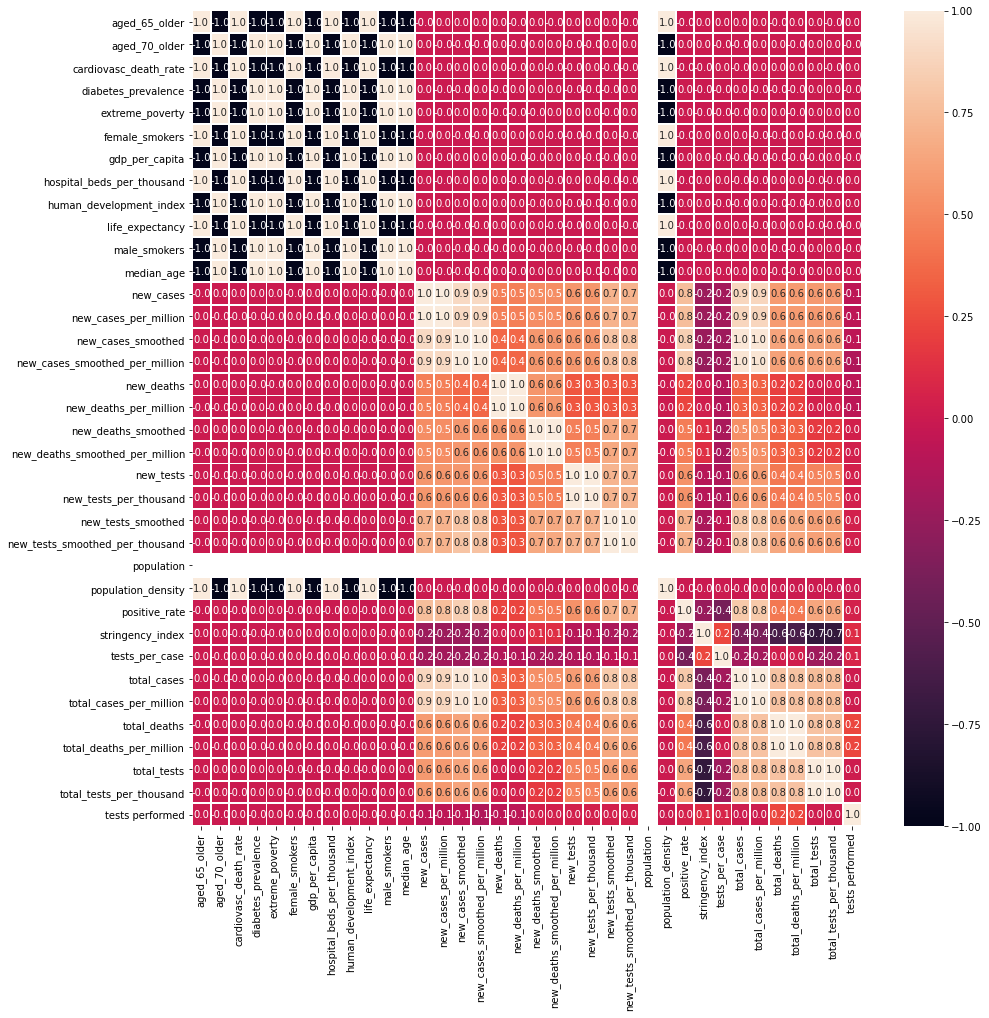

In [135]:

#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_slovakia.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

#drop columns(aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,gdp_per_capita,
hospital_beds_per_thousand,human_development_index,life_expectancy,male_smokers,median_age,female_smokers)they are corelated to each other.
#drop- population and population_density ,stringency_index,not correlated to new_cases
#new_cases and new_cases_per_million are corelated we will drop new_cases_per_million.
#new_cases_smoothed ,new_cases_smoothed_per_million are correlated we will dope new_cases_smoothed_per_million.
#new_deaths_smoothed_per_million and new_deaths_smoothed are correlated drop new_deaths_smoothed_per_million
#new_deaths_per_million and new_deaths are correlated we drop new_deaths_per_million.
# drop new_tests_smoothed_per_thousand  and new_tests_per_thousand 
#



In [ ]:

#drop_list=['aged_65_older','aged_70_older''cardiovasc_death_rate','diabetes_prevalence','female_smokers','gdp_per_capita','male_smokers','human_development_index',
           'population','life_expectancy','aged_65_older','aged_70_older','median_age','new_cases_smoothed_per_million','hospital_beds_per_thousand','new_cases_per_million'
            'population_density','stringency_index','new_deaths_smoothed_per_million','new_deaths_per_million','new_tests_smoothed_per_thousand','new_tests_per_thousand',
           'tests_per_case','total_deaths_per_million'],axis=1, inplace=True)

In [145]:

df_slovakia.drop(['aged_65_older','aged_70_older','cardiovasc_death_rate','diabetes_prevalence','female_smokers','gdp_per_capita','male_smokers','human_development_index',
           'population','life_expectancy','aged_65_older','aged_70_older','median_age','new_cases_smoothed_per_million','hospital_beds_per_thousand','new_cases_per_million',
            'population_density','stringency_index','new_deaths_smoothed_per_million','new_deaths_per_million','new_tests_smoothed_per_thousand','new_tests_per_thousand',
           'tests_per_case','total_deaths_per_million','tests performed','total_cases_per_million','total_tests_per_thousand'],axis=1, inplace=True)

KeyError: "['aged_65_older' 'aged_70_older' 'cardiovasc_death_rate'\n 'diabetes_prevalence' 'female_smokers' 'gdp_per_capita' 'male_smokers'\n 'human_development_index' 'population' 'life_expectancy' 'aged_65_older'\n 'aged_70_older' 'median_age' 'new_cases_smoothed_per_million'\n 'hospital_beds_per_thousand' 'new_cases_per_million' 'population_density'\n 'stringency_index' 'new_deaths_smoothed_per_million'\n 'new_deaths_per_million' 'new_tests_smoothed_per_thousand'\n 'new_tests_per_thousand' 'tests_per_case' 'total_deaths_per_million'] not found in axis"

In [146]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      222 non-null    datetime64[ns]
 1   extreme_poverty           222 non-null    float64       
 2   new_cases                 222 non-null    float64       
 3   new_cases_smoothed        222 non-null    float64       
 4   new_deaths                222 non-null    float64       
 5   new_deaths_smoothed       222 non-null    float64       
 6   new_tests                 222 non-null    float64       
 7   new_tests_smoothed        222 non-null    float64       
 8   positive_rate             222 non-null    float64       
 9   total_cases               222 non-null    float64       
 10  total_cases_per_million   222 non-null    float64       
 11  total_deaths              222 non-null    float64       
 12  total_tests     

In [147]:
df_slovakia.drop(['tests performed','total_cases_per_million','total_tests_per_thousand'], axis=1,inplace=True)

In [148]:
df_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 222 non-null    datetime64[ns]
 1   extreme_poverty      222 non-null    float64       
 2   new_cases            222 non-null    float64       
 3   new_cases_smoothed   222 non-null    float64       
 4   new_deaths           222 non-null    float64       
 5   new_deaths_smoothed  222 non-null    float64       
 6   new_tests            222 non-null    float64       
 7   new_tests_smoothed   222 non-null    float64       
 8   positive_rate        222 non-null    float64       
 9   total_cases          222 non-null    float64       
 10  total_deaths         222 non-null    float64       
 11  total_tests          222 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 22.5 KB


In [150]:
df_slovakia.drop(['extreme_poverty'], axis=1,inplace=True)

In [152]:
df_slovakia.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 41803 to 42024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 222 non-null    datetime64[ns]
 1   new_cases            222 non-null    float64       
 2   new_cases_smoothed   222 non-null    float64       
 3   new_deaths           222 non-null    float64       
 4   new_deaths_smoothed  222 non-null    float64       
 5   new_tests            222 non-null    float64       
 6   new_tests_smoothed   222 non-null    float64       
 7   positive_rate        222 non-null    float64       
 8   total_cases          222 non-null    float64       
 9   total_deaths         222 non-null    float64       
 10  total_tests          222 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 20.8 KB


In [155]:
df_slovakia['date'] = pd.to_numeric(df_slovakia['date'])

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y_data = df_slovakia['new_cases']
x_data = df_slovakia[['date','new_cases_smoothed','new_deaths','new_deaths_smoothed',
                      'new_tests','new_tests_smoothed','positive_rate','total_cases','total_deaths','total_tests']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
x_data.head(5)

number of test samples : 45
number of training samples: 177


,date,new_cases_smoothed,new_deaths,new_deaths_smoothed,new_tests,new_tests_smoothed,positive_rate,total_cases,total_deaths,total_tests
41803,1583539200000000000,22.714,0.0,0.0,2225.0,2232.0,0.016,1.0,0.0,217942.0
41804,1583625600000000000,22.714,0.0,0.0,2225.0,2232.0,0.016,3.0,0.0,217942.0
41805,1583712000000000000,22.714,0.0,0.0,2225.0,2232.0,0.016,5.0,0.0,217942.0
41806,1583884800000000000,22.714,0.0,0.0,2225.0,2232.0,0.016,7.0,0.0,217942.0
41807,1583971200000000000,22.714,0.0,0.0,2225.0,2232.0,0.016,10.0,0.0,217942.0


In [157]:
lm = LinearRegression()
lm.fit(x_train, y_train)
Y_hat=lm.predict(x_test)

In [ ]:
print ('Coefficients: ', lm.coef_)
print ('Intercept: ' , lm.intercept_)
print('Train score :',lm.score(x_train, y_train))
print('Test score :', lm.score(x_test, y_test) )